In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')


from sklearn.linear_model import LinearRegression

lr = LinearRegression

C:\Users\mohdkashif\AppData\Local\Temp\ipykernel_11196\3845080357.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [70]:
# Importing Data
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [71]:
# Exploring data in dataframe

data.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

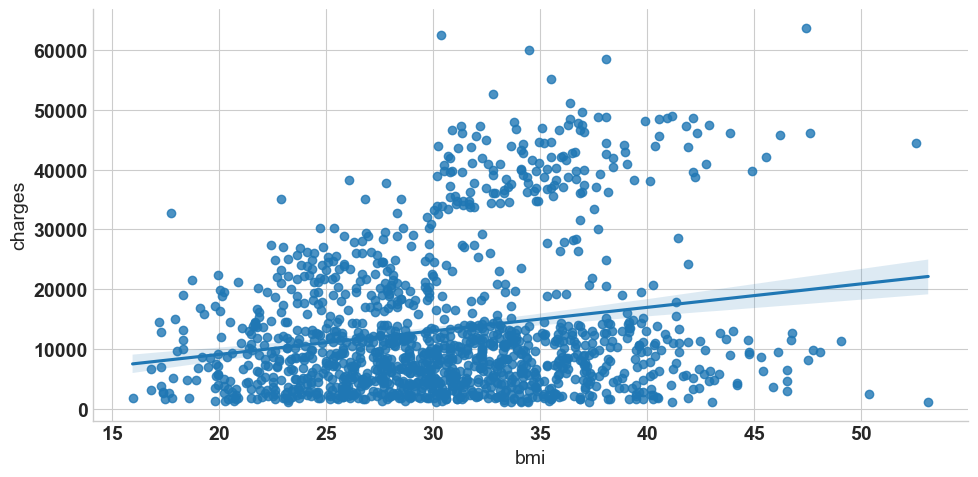

In [72]:
sns.lmplot(x = 'bmi', y = 'charges', data = data, aspect = 2)

In [73]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\mohdkashif\AppData\Local\Temp\ipykernel_11196\724476197.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'], bins = 50, color = 'r', ax=ax)
C:\Users\mohdkashif\AppData\Local\Temp\ipykernel_11196\724476197.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data[

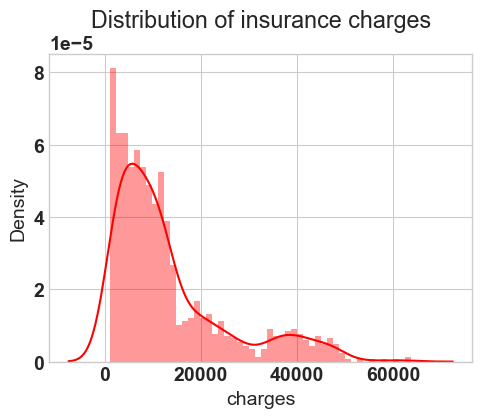

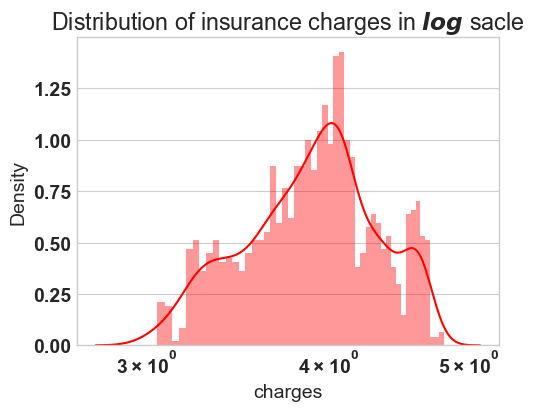

In [74]:
f = plt.figure(figsize = (12,4))
ax = f.add_subplot(121)
sns.distplot(data['charges'], bins = 50, color = 'r', ax=ax)
ax.set_title('Distribution of insurance charges')

f = plt.figure(figsize = (12,4))
ax = f.add_subplot(121)
sns.distplot(np.log10(data['charges']), bins = 50, color = 'r', ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

Text(0.5, 1.0, 'Violin plot of Charges vs sex')

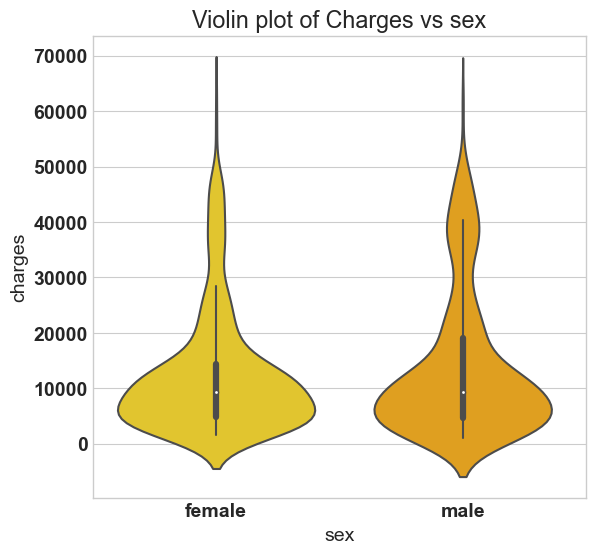

In [75]:
f = plt.figure(figsize =(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges', data = data, palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

In [76]:
categorical_columns = ['sex', 'smoker','children', 'region']
df_encode = pd.get_dummies(data = data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
df_encode

,age,bmi,charges,OHE_male,OHE_yes,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,1,0,0,0,0,0,0,0,1
1,18,33.770,1725.55230,1,0,1,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,0,1,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,0,1,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [77]:
df_encode.shape

(1338, 13)

<Axes: ylabel='Density'>

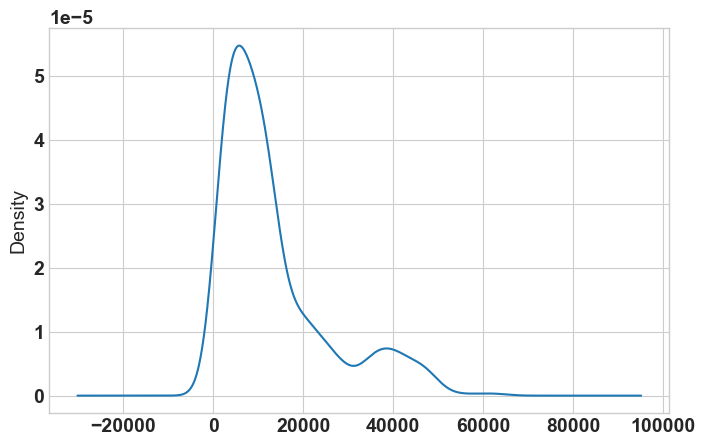

In [78]:
data['charges'].plot(kind='kde')

plot shows non-normal distribution.
we need box-cox transform

In [54]:
from scipy.stats import boxcox
y_bc, lam, ci= boxcox(df_encode['charges'], alpha = 0.05)

In [63]:
df = pd.DataFrame(y_bc)
df

,0
0,12.128980
1,8.808596
2,10.147521
3,12.534950
4,9.945637
...,...
1333,11.424196
1334,9.150491
1335,8.729683
1336,9.019131


In [66]:
df2 = np.log(df_encode['charges'])
df2

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1338, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges', axis =1)
y = df2

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=46)

In [86]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [87]:
y_pred = lin_reg.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred, y_test)
J_mse_sk

0.17536704185122248